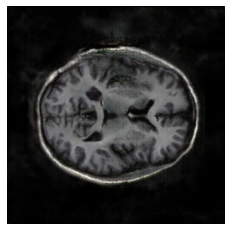

In [4]:
# example of loading the generator model and generating images
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot
import tensorflow as tf
from os import listdir
from PIL import Image
import numpy as np
import cv2
import tqdm

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

# create a plot of generated images
def plot_generated(examples, n):
    # plot images
    
    for i in range(n * n):
       
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
       
        pyplot.imshow(examples[i, :, :])
        
    pyplot.show()

# load model
model = load_model('generator_model_0.621.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X  = model.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

# plot the result
plot_generated(X, 1)

In [5]:
def load_image(filename):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = asarray(image)
    return pixels

def Cal_SSIM(directory,img):
    required_size=(256, 256)
    max_ssim = 0
    ssim_list=[]
    k = 0
    
    for filename in listdir(directory):
        k+=1
        if k == 500:
            break
        pixels = load_image(directory + filename)
        image = Image.fromarray(pixels)
        image = image.resize(required_size)
        brain = asarray(image)
        brain= tf.convert_to_tensor(brain)
        img= tf.convert_to_tensor(img)
        brain = tf.cast(brain, dtype= tf.float32)
        res=tf.image.ssim(img, brain, 255)
        res=res.numpy()
        ssim_list.append(res)
        max_ssim=max(res, max_ssim)

    return max_ssim


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [09:21<00:00,  5.62s/it]

SSIM =  0.6211671775579453


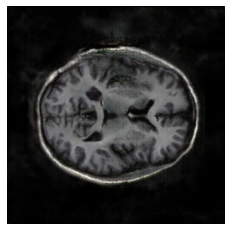

In [6]:
n=1
res_ssim=[]
latent_points = generate_latent_points(100, 100)
X_com = X*255
n=100
res_ssim=[]
Max_ssim = 0

for k in tqdm.tqdm(range(n)):
    img=X_com[k, :, :]
    img1=img.copy()

    img = np.array(img,np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret3,th3 = cv2.threshold(img,52,255,0)
    contours, hierarchy = cv2.findContours(th3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for i in range(len(contours)):
        area = cv2.contourArea(contours[i])
        if area < 150:
            cv2.drawContours(th3, [contours[i]], 0, 0, -1)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if i<20or i>img1.shape[0]-20:
                img1[i][j][0]= 0
                img1[i][j][1]= 0
                img1[i][j][2]= 0

            if j<20or j>img1.shape[1]-20:
                img1[i][j][0] = 0
                img1[i][j][1]= 0
                img1[i][j][2]= 0

            if th3[i][j]==0:
                img1[i][j][0]=0
                img1[i][j][1]= 0
                img1[i][j][2]= 0

    res=Cal_SSIM('../keras_png_slices_data/keras_png_slices_test/',img1)

    res_ssim.append(res)

Max_ssim=sum(res_ssim)/n
print("SSIM = ",Max_ssim)

# plot the example
plot_generated(X, 1)

In [ ]:
for i in range(10):
    pyplot.axis('off')
        pyplot.imshow(X[i])
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)